In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

In [2]:
solicitacoes_credito = pd.read_csv('CP2/Arquivos/solicitacoescredito.csv')


solicitacoes_credito.head(2)

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.0,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [3]:
solicitacoes_credito.tail(2)

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
8971,9044,Keith Jones,Steven Kennedy-Jones,BRJP37453437154592,11,0.424099,0.0,2011-08-10T00:00:00,31,559679.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994786,NaN,NaN
8972,9045,Cheryl Johnson,Chelsea Kay-Sinclair,COZD54939108010752,4,0.365041,0.0,2009-05-27T00:00:00,56,13640.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [4]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [5]:
solicitacoes_credito.isnull().sum()

numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                 

In [6]:
solicitacoes_credito.nunique()

numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [7]:
solicitacoes_credito2 = solicitacoes_credito.drop(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'cnpjSemTraco', 'dataAprovadoEmComite', 'scorePontualidade', 'dashboardCorrelacao', 'definicaoRisco', 'diferencaPercentualRisco', 'margemBrutaAcumulada', 'percentualProtestos', 'periodoDemonstrativoEmMeses', 'restricoes', 'empresa_MeEppMei'], axis=1)

solicitacoes_credito2.head(2)
solicitacoes_credito2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  8973 non-null   int64  
 1   primeiraCompra               8867 non-null   object 
 2   prazoMedioRecebimentoVendas  8973 non-null   int64  
 3   titulosEmAberto              8973 non-null   float64
 4   valorSolicitado              8973 non-null   float64
 5   status                       8973 non-null   object 
 6   percentualRisco              8973 non-null   float64
 7   valorAprovado                7569 non-null   float64
 8   periodoBalanco               4733 non-null   object 
 9   ativoCirculante              4733 non-null   float64
 10  passivoCirculante            4733 non-null   float64
 11  totalAtivo                   4733 non-null   float64
 12  totalPatrimonioLiquido       4733 non-null   float64
 13  endividamento     

In [8]:
solicitacoes_credito3 = solicitacoes_credito2

solicitacoes_credito3 = solicitacoes_credito3.drop_duplicates()

solicitacoes_credito3['ano_primeiraCompra'] = pd.to_datetime(solicitacoes_credito3['primeiraCompra'], errors='coerce').dt.year

solicitacoes_credito3['primeiraCompra_valida'] = solicitacoes_credito3['primeiraCompra'].notna().astype(int)

solicitacoes_credito3 = solicitacoes_credito3.drop(['primeiraCompra', 'dataAprovadoNivelAnalista'], axis=1)

solicitacoes_credito3 = solicitacoes_credito3.dropna(subset=['totalPatrimonioLiquido'])

solicitacoes_credito3 = solicitacoes_credito3.fillna(0)

max_atraso = solicitacoes_credito3['maiorAtraso'].max()

solicitacoes_credito3['score_atraso'] = 1 - (solicitacoes_credito3['maiorAtraso'] / max_atraso)

# Garantir que o score esteja no intervalo [0, 1]
solicitacoes_credito3['score_atraso'] = np.clip(solicitacoes_credito3['score_atraso'], 0, 1)

solicitacoes_credito3 = solicitacoes_credito3[solicitacoes_credito3['totalPatrimonioLiquido'] != 0]

solicitacoes_credito3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4136 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4136 non-null   int64  
 1   prazoMedioRecebimentoVendas  4136 non-null   int64  
 2   titulosEmAberto              4136 non-null   float64
 3   valorSolicitado              4136 non-null   float64
 4   status                       4136 non-null   object 
 5   percentualRisco              4136 non-null   float64
 6   valorAprovado                4136 non-null   float64
 7   periodoBalanco               4136 non-null   object 
 8   ativoCirculante              4136 non-null   float64
 9   passivoCirculante            4136 non-null   float64
 10  totalAtivo                   4136 non-null   float64
 11  totalPatrimonioLiquido       4136 non-null   float64
 12  endividamento                4136 non-null   float64
 13  duplicatasAReceber     

C:\Users\laris\AppData\Local\Temp\ipykernel_18392\4252880345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solicitacoes_credito3['ano_primeiraCompra'] = pd.to_datetime(solicitacoes_credito3['primeiraCompra'], errors='coerce').dt.year
C:\Users\laris\AppData\Local\Temp\ipykernel_18392\4252880345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solicitacoes_credito3['primeiraCompra_valida'] = solicitacoes_credito3['primeiraCompra'].notna().astype(int)


In [9]:
# profile = ProfileReport(solicitacoes_credito3)

In [10]:
# profile.to_file("relatorio1.html")

In [11]:
# import tkinter as tk
# from tkinter import messagebox

# def show_alert():
#     root = tk.Tk()
#     root.withdraw()  # Oculta a janela principal
#     messagebox.showinfo("Informação", "Código Concluído")

# show_alert()


Modelo teste 1

In [12]:
from sklearn.preprocessing import LabelEncoder

# Identifica as colunas do tipo 'object' (textos)
colunas_txt = solicitacoes_credito3.select_dtypes(include=['object']).columns

# Inicializa o codificador
label_encoder = LabelEncoder()

# Cria uma cópia do DataFrame para não modificar o original
solicitacoes_tratadas = solicitacoes_credito3.copy()

# Itera sobre as colunas de texto e aplica LabelEncoder
for col in colunas_txt:
    # Converte todos os valores da coluna para strings
    solicitacoes_tratadas[col] = solicitacoes_tratadas[col].astype(str)
    # Aplica LabelEncoder
    solicitacoes_tratadas[col] = label_encoder.fit_transform(solicitacoes_tratadas[col])


solicitacoes_tratadas = solicitacoes_credito3

In [13]:

from sklearn.preprocessing import LabelEncoder

# Supondo que 'solicitacoes_credito3' é seu DataFrame
# Identifica as colunas de texto
colunas_txt = solicitacoes_credito3.select_dtypes(include=['object']).columns

# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Itera sobre as colunas de texto e aplica o LabelEncoder
for col in colunas_txt:
    # Verifica se a coluna tem valores não nulos
    if solicitacoes_credito3[col].notnull().all():
        # Codifica os valores da coluna
        solicitacoes_credito3[col] = label_encoder.fit_transform(solicitacoes_credito3[col])
    else:
        # Se a coluna tiver valores nulos, preenche com uma string padrão
        solicitacoes_credito3[col] = solicitacoes_credito3[col].fillna('Unknown')
        # E então aplica o LabelEncoder
        solicitacoes_credito3[col] = label_encoder.fit_transform(solicitacoes_credito3[col])

# Exibe as primeiras linhas do DataFrame tratado
solicitacoes_credito3.head()


,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,percentualRisco,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,...,faturamentoBruto,margemBruta,custos,anoFundacao,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,ano_primeiraCompra,primeiraCompra_valida,score_atraso
4,20,20,1486.95,50000.0,1,0.169811,50000.0,32,14758917.0,12149031.0,...,40779757.0,81459809.0,40680051.0,2002.0,0,75000.0,89000.0,2010.0,1,0.979529
7,4,102,208980.00,300000.0,1,0.056604,300000.0,33,17801610.0,2538069.0,...,11958227.0,9357949.0,0.0,2000.0,0,120000.0,768233.0,2007.0,1,0.995906
8,43,27,6432.00,400000.0,1,0.113208,400000.0,11,36827690.0,13843198.0,...,72479551.0,6233236.0,-49267738.0,2000.0,0,1000000.0,6910219.0,2006.0,1,0.955988
10,7,0,0.00,1000000.0,1,0.396226,800000.0,23,2127907.0,704245.0,...,4575646.0,296634.0,-3299332.0,2011.0,3,20000.0,81000.0,2012.0,1,0.992835
11,26,0,0.00,200000.0,2,0.415094,50000.0,11,5369982.0,6118711.0,...,13871246.0,-772398.0,-9455401.0,2009.0,2,600000.0,183509.0,2017.0,1,0.973388


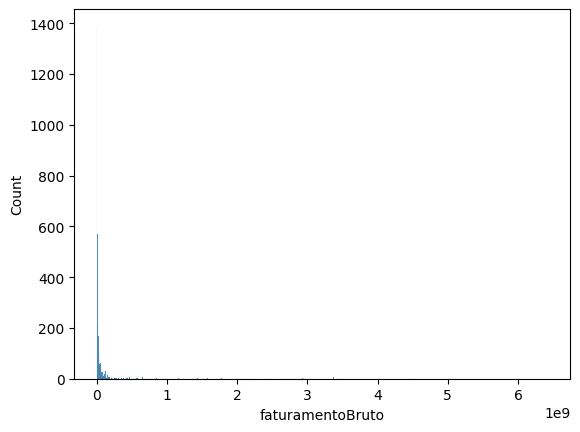

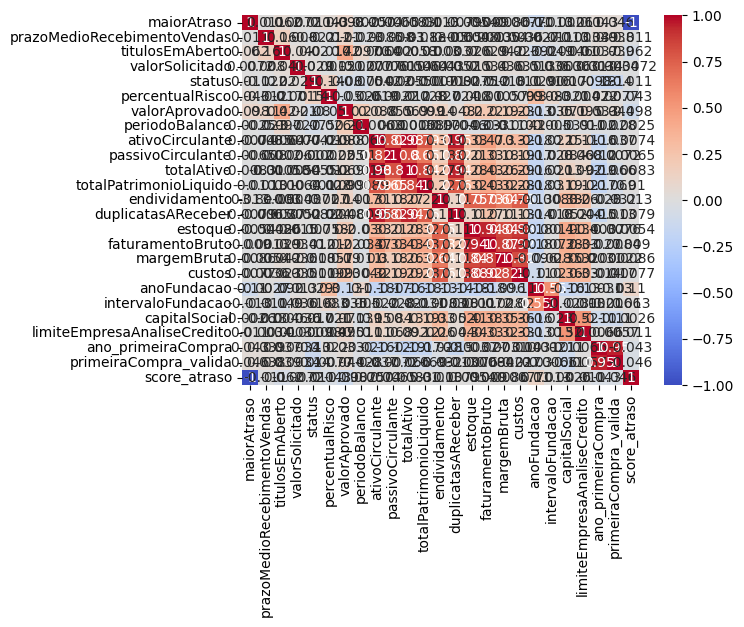

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
sns.histplot(solicitacoes_credito3['faturamentoBruto'])
plt.show()

# Heatmap de correlação
corr = solicitacoes_credito3.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [19]:
from sklearn.cluster import KMeans

# Selecionar variáveis para clustering
features = solicitacoes_credito3[['faturamentoBruto', 'totalPatrimonioLiquido', 'endividamento']]

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=2)  # Defina o número de clusters
solicitacoes_credito3 ['Cluster'] = kmeans.fit_predict(scaled_features)


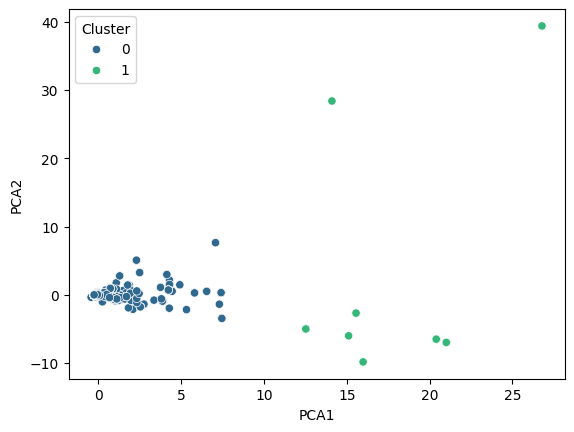

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
solicitacoes_credito3['PCA1'] = principal_components[:, 0]
solicitacoes_credito3['PCA2'] = principal_components[:, 1]

# Visualizar clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=solicitacoes_credito3, palette='viridis')
plt.show()
